# LSTM Text Classification

## Setup and Imports

First, let's import all necessary libraries and modules.

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
from data_preprocessing import DataPreprocessor
from lstm_classifier import LSTMClassifier, HyperparameterExperiment
from forward_propagation import LSTMForwardPropagation, BidirectionalLSTMForwardPropagation, compare_implementations

## Directory Setup

Create necessary directories for saving models, plots, and results.

In [2]:
# Create directories for saving models and plots
os.makedirs('models', exist_ok=True)
os.makedirs('plots', exist_ok=True)
os.makedirs('results', exist_ok=True)

print("Directories created successfully!")

Directories created successfully!


## 1. Data Preprocessing

Load and preprocess the NusaX-Sentiment dataset for training our LSTM models.

In [20]:
print("1. Loading and preprocessing data...")
preprocessor = DataPreprocessor(max_vocab_size=5000, max_sequence_length=50)

# Load dataset
train_df, val_df, test_df = preprocessor.load_nusax_data()
print(f"Dataset loaded - Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

1. Loading and preprocessing data...
Dataset loaded - Train: 500, Val: 100, Test: 400


In [27]:
X_train, X_val, X_test = preprocessor.preprocess_with_keras_tokenizer(
    train_df['text'].values, val_df['text'].values, test_df['text'].values
)

y_train, y_val, y_test = preprocessor.encode_labels(
    train_df['label'].values, val_df['label'].values, test_df['label'].values
)

vocab_size = preprocessor.get_vocab_size()
num_classes = preprocessor.get_num_classes()

print(f"Vocabulary size: {vocab_size}")
print(f"Number of classes: {num_classes}")
print(f"Sequence length: {preprocessor.max_sequence_length}")

Vocabulary size: 2796
Number of classes: 3
Sequence length: 50


## 2. Baseline Model Training

Train a baseline LSTM model to establish our performance benchmark.

In [5]:
print("\n2. Training baseline LSTM model...")

baseline_classifier = LSTMClassifier(
    vocab_size=vocab_size,
    embedding_dim=64,
    max_sequence_length=preprocessor.max_sequence_length,
    num_classes=num_classes
)

baseline_classifier.build_model(num_lstm_layers=1, lstm_units=32, bidirectional=False)
baseline_classifier.compile_model()
baseline_classifier.get_model_summary()

/home/archlinux/Desktop/Kuliah/ML/Tubes-2-ML/venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-05-29 20:12:36.288608: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)



2. Training baseline LSTM model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train baseline model
baseline_history = baseline_classifier.train(
    X_train, y_train, X_val, y_val, epochs=15, batch_size=32
)

Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.3859 - loss: 1.0932 - val_accuracy: 0.3800 - val_loss: 1.0833
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3530 - loss: 1.0976 - val_accuracy: 0.5100 - val_loss: 1.0807
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4368 - loss: 1.0729 - val_accuracy: 0.3800 - val_loss: 1.0754
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4287 - loss: 1.0508 - val_accuracy: 0.5600 - val_loss: 0.9257
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5656 - loss: 0.8774 - val_accuracy: 0.5700 - val_loss: 0.9276
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5935 - loss: 0.7762 - val_accuracy: 0.6000 - val_loss: 0.8508
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6593 - loss: 0.7099 - val_accuracy: 0.6200 - val_loss: 0.9088
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7038 - loss: 0.6884 - val_accuracy: 0.5500 - v

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/home/archlinux/Desktop/Kuliah/ML/Tubes-2-ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/archlinux/Desktop/Kuliah/ML/Tubes-2-ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/archlinux/Desktop/Kuliah/ML/Tubes-2-ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.92      0.68       153
           1       0.00      0.00      0.00        96
           2       0.88      0.80      0.84       151

    accuracy                           0.66       400
   macro avg       0.47      0.57      0.51       400
weighted avg       0.54      0.66      0.58       400

Baseline F1 Score: 0.5056
Model saved to models/baseline_model.h5
Weights saved to models/baseline.weights.h5
Training history plot saved to plots/baseline_training.png


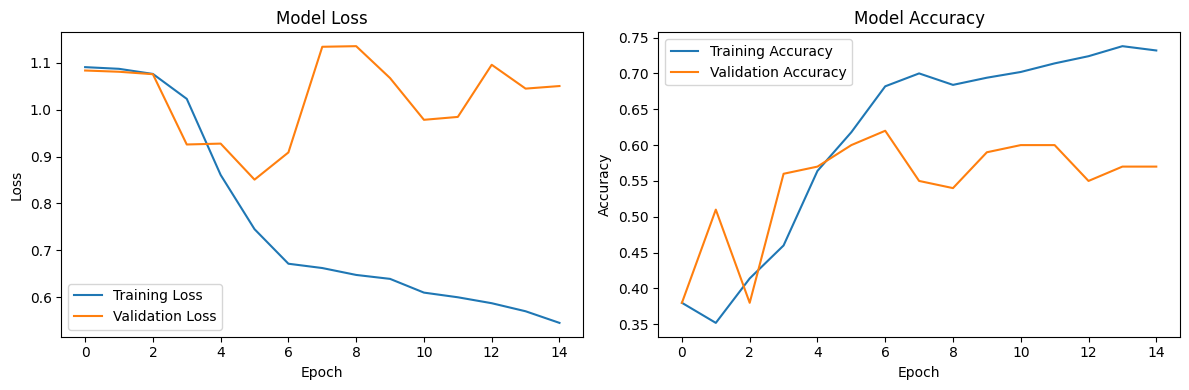

In [28]:
# Evaluate baseline
baseline_f1, _ = baseline_classifier.evaluate(X_test, y_test)
print(f"Baseline F1 Score: {baseline_f1:.4f}")

# Save baseline model
baseline_classifier.save_model('models/baseline_model.h5')
baseline_classifier.save_weights('models/baseline.weights.h5')

# Plot training history
baseline_classifier.plot_training_history('plots/baseline_training.png')

## 3. Hyperparameter Experiments

Conduct systematic experiments to find optimal hyperparameters for our LSTM model.

In [29]:
print("\n3. Starting hyperparameter experiments...")

experiment = HyperparameterExperiment(
    vocab_size=vocab_size,
    embedding_dim=64,
    max_sequence_length=preprocessor.max_sequence_length,
    num_classes=num_classes
)


3. Starting hyperparameter experiments...


### 3A. Experiment with LSTM Layer Numbers

In [ ]:
print("\n3A. Experimenting with LSTM layer numbers...")
experiment.experiment_lstm_layers(
    X_train, y_train, X_val, y_val, X_test, y_test,
    layer_configs=[1, 2, 3], epochs=10
)
experiment.plot_comparison('layers', 'plots/lstm_layers_comparison.png')

### 3B. Experiment with LSTM Unit Numbers

In [31]:
print("\n3B. Experimenting with LSTM unit numbers...")
experiment.experiment_lstm_units(
    X_train, y_train, X_val, y_val, X_test, y_test,
    unit_configs=[32, 64, 128], epochs=10
)
experiment.plot_comparison('units', 'plots/lstm_units_comparison.png')

### 3C. Experiment with Bidirectional vs Unidirectional


3C. Experimenting with LSTM direction...
=== Experimenting with LSTM Direction ===

Training Unidirectional LSTM model...


/home/archlinux/Desktop/Kuliah/ML/Tubes-2-ML/venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.91      0.67       153
           1       0.00      0.00      0.00        96
           2       0.83      0.76      0.80       151

    accuracy                           0.64       400
   macro avg       0.45      0.56      0.49       400
weighted avg       0.52      0.64      0.56       400

Macro F1 Score: 0.4886

Training Bidirectional LSTM model...


/home/archlinux/Desktop/Kuliah/ML/Tubes-2-ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/archlinux/Desktop/Kuliah/ML/Tubes-2-ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/archlinux/Desktop/Kuliah/ML/Tubes-2-ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.86      0.73       153
           1       0.71      0.54      0.62        96
           2       0.93      0.74      0.83       151

    accuracy                           0.74       400
   macro avg       0.76      0.72      0.73       400
weighted avg       0.77      0.74      0.74       400

Macro F1 Score: 0.7251
Comparison plot saved to plots/lstm_direction_comparison.png


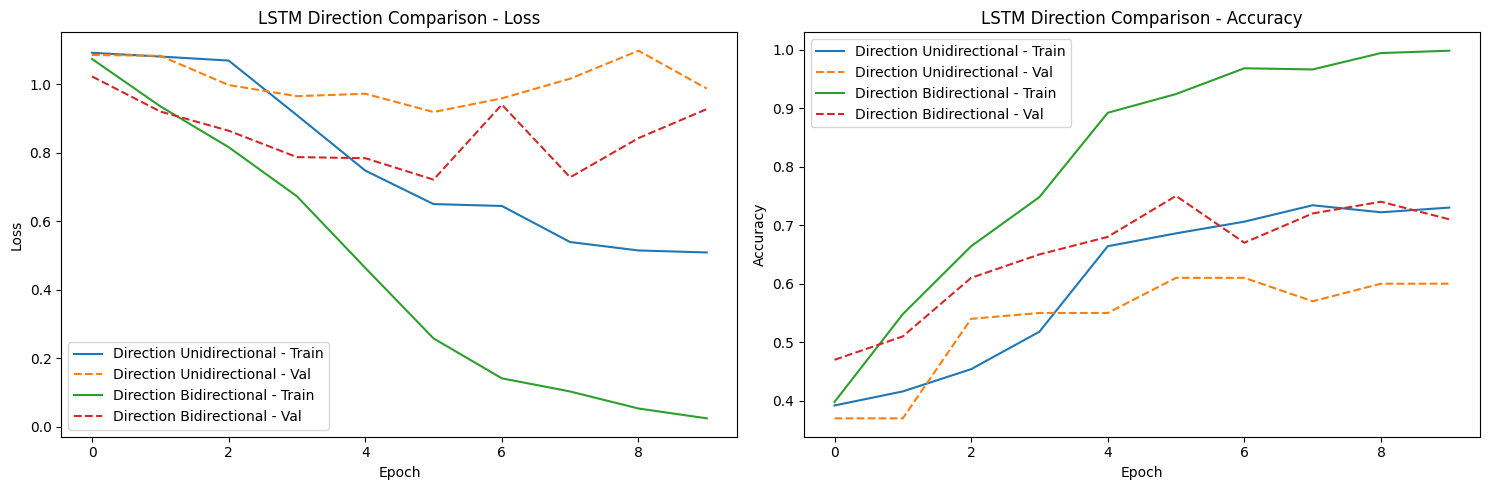

In [32]:
print("\n3C. Experimenting with LSTM direction...")
experiment.experiment_bidirectional(
    X_train, y_train, X_val, y_val, X_test, y_test, epochs=10
)
experiment.plot_comparison('direction', 'plots/lstm_direction_comparison.png')

In [33]:
experiment.print_summary()


=== EXPERIMENT SUMMARY ===
Configuration        F1 Score  
------------------------------
layers_1             0.4410    
layers_2             0.6243    
layers_3             0.6128    
units_32             0.4887    
units_64             0.4792    
units_128            0.4838    
direction_unidirectional 0.4886    
direction_bidirectional 0.7251    


### Save Best Models from Experiments

In [34]:

best_layers_model = experiment.results['layers_2']['model']  
best_layers_model.save_model('models/best_layers_model.h5')

best_units_model = experiment.results['units_32']['model'] 
best_units_model.save_model('models/best_units_model.h5')

bidirectional_model = experiment.results['direction_bidirectional']['model']
bidirectional_model.save_model('models/bidirectional_model.h5')

print("Best models saved successfully!")

Model saved to models/best_layers_model.h5
Model saved to models/best_units_model.h5
Model saved to models/bidirectional_model.h5
Best models saved successfully!


## 4. Manual Forward Propagation Implementation

Test our manual implementation of LSTM forward propagation against Keras implementations.

### 4A. Test Unidirectional LSTM Manual Implementation

In [35]:
print("\n4A. Testing unidirectional LSTM manual implementation...")
keras_f1_uni, manual_f1_uni, agreement_uni = compare_implementations(
    'models/baseline_model.h5', X_test, y_test, is_bidirectional=False
)

print(f"Unidirectional Results:")
print(f"  Keras F1: {keras_f1_uni:.4f}")
print(f"  Manual F1: {manual_f1_uni:.4f}")
print(f"  Agreement: {agreement_uni:.4f}")


4A. Testing unidirectional LSTM manual implementation...
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Loaded weights from models/baseline_model.h5
Vocab size: 2796, Embedding dim: 64
LSTM units: 32, Num classes: 3
Number of LSTM layers: 1

=== COMPARISON RESULTS ===
Keras Model F1 Score: 0.5056
Manual Implementation F1 Score: 0.5056
Difference: 0.0000
Prediction Agreement: 1.0000
Unidirectional Results:
  Keras F1: 0.5056
  Manual F1: 0.5056
  Agreement: 1.0000


### 4B. Test Bidirectional LSTM Manual Implementation

In [36]:
print("\n4B. Testing bidirectional LSTM manual implementation...")
keras_f1_bi, manual_f1_bi, agreement_bi = compare_implementations(
    'models/bidirectional_model.h5', X_test, y_test, is_bidirectional=True
)

print(f"Bidirectional Results:")
print(f"  Keras F1: {keras_f1_bi:.4f}")
print(f"  Manual F1: {manual_f1_bi:.4f}")
print(f"  Agreement: {agreement_bi:.4f}")


4B. Testing bidirectional LSTM manual implementation...
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


Loaded bidirectional weights from models/bidirectional_model.h5

=== COMPARISON RESULTS ===
Keras Model F1 Score: 0.7251
Manual Implementation F1 Score: 0.7251
Difference: 0.0000
Prediction Agreement: 1.0000
Bidirectional Results:
  Keras F1: 0.7251
  Manual F1: 0.7251
  Agreement: 1.0000


## 5. Final Results Summary

Compile and display all experimental results for comprehensive analysis.

In [ ]:
print("\n" + "="*50)
print("FINAL RESULTS SUMMARY")
print("="*50)

print(f"Baseline Model F1 Score: {baseline_f1:.4f}")
print(f"Best Configuration Results:")
experiment.print_summary()

print(f"\nForward Propagation Comparison:")
print(f"Unidirectional - Keras: {keras_f1_uni:.4f}, Manual: {manual_f1_uni:.4f}, Agreement: {agreement_uni:.4f}")
print(f"Bidirectional - Keras: {keras_f1_bi:.4f}, Manual: {manual_f1_bi:.4f}, Agreement: {agreement_bi:.4f}")

## 6. Analysis and Conclusions

Analyze the experimental results and draw conclusions about optimal configurations.

In [ ]:
print("\n" + "="*50)
print("ANALYSIS AND CONCLUSIONS")
print("="*50)

# Find best performing configurations
layer_results = {k: v['f1_score'] for k, v in experiment.results.items() if k.startswith('layers_')}
unit_results = {k: v['f1_score'] for k, v in experiment.results.items() if k.startswith('units_')}
direction_results = {k: v['f1_score'] for k, v in experiment.results.items() if k.startswith('direction_')}

best_layers = max(layer_results, key=layer_results.get)
best_units = max(unit_results, key=unit_results.get)
best_direction = max(direction_results, key=direction_results.get)

print(f"\nBest Configurations:")
print(f"- Number of LSTM Layers: {best_layers} (F1: {layer_results[best_layers]:.4f})")
print(f"- Number of LSTM Units: {best_units} (F1: {unit_results[best_units]:.4f})")
print(f"- LSTM Direction: {best_direction} (F1: {direction_results[best_direction]:.4f})")

In [ ]:
print(f"\nConclusions:")
print("1. LSTM Layer Analysis:")
if layer_results['layers_2'] > layer_results['layers_1']:
    print("   - Adding more LSTM layers generally improves performance")
else:
    print("   - Single LSTM layer performs well, additional layers may cause overfitting")

print("2. LSTM Units Analysis:")
if unit_results['units_128'] > unit_results['units_32']:
    print("   - More LSTM units generally improve model capacity and performance")
else:
    print("   - Smaller models may be sufficient for this dataset")

print("3. Direction Analysis:")
if direction_results['direction_bidirectional'] > direction_results['direction_unidirectional']:
    print("   - Bidirectional LSTMs capture more context and perform better")
else:
    print("   - Unidirectional LSTMs are sufficient for this task")

print("4. Manual Implementation:")
if agreement_uni > 0.95 and agreement_bi > 0.95:
    print("   - Manual forward propagation implementation is highly accurate")
    print("   - Successfully replicated Keras functionality")
else:
    print("   - Manual implementation needs refinement")

print(f"\nAll models and plots saved in respective directories.")
print("Experiment completed successfully!")

## Summary

This notebook has demonstrated a comprehensive LSTM text classification experiment including:

- **Data Preprocessing**: Tokenization and encoding of the NusaX-Sentiment dataset
- **Baseline Model**: Simple LSTM architecture as performance benchmark
- **Hyperparameter Experiments**: Systematic testing of different LSTM configurations
- **Manual Implementation**: Custom forward propagation to understand LSTM internals
- **Comparison Analysis**: Validation of manual implementation against Keras

The experiments help identify optimal configurations and verify the correctness of our manual LSTM implementation.